In [12]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import optuna
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# prepare the data
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
RANDOM_SEED = 42

#normalize train and then test data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=boston.feature_names)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=boston.feature_names)

def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=10)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params



def ridge_objective(trial):
    
    # 5-fold CV
    kfolds = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)# Define the helper function so that it can be reused

    _alpha = trial.suggest_float("alpha", 0.1, 20)
    ridge = Ridge(alpha=_alpha, random_state=RANDOM_SEED)
    scores = cross_val_score(
        ridge, X_train, y_train, cv=kfolds,
        scoring="neg_mean_squared_error"
    )
    return scores.mean()


ridge_params = tune(ridge_objective)
ridge = Ridge(**ridge_params, random_state=RANDOM_SEED)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[I 2022-08-22 20:36:31,872] A new study created in memory with name: no-name-bba854e1-09bf-4fde-9ee3-12e4a943ee9b
[I 2022-08-22 20:36:31,892] Trial 0 finished with value: -39.1485037963693 and parameters: {'alpha': 19.32159090396838}. Best is trial 0 with value: -39.1485037963693.
[I 2022-08-22 20:36:31,910] Trial 1 finished with value: -37.24365105518069 and parameters: {'alpha': 15.972521278791216}. Best is trial 1 with value: -37.24365105518069.
[I 2022-08-22 20:36:31,929] Trial 2 finished with value: -27.01389408135883 and parameters: {'alpha': 3.129848623933494}. Best is trial 2 with value: -27.01389408135883.
[I 2022-08-22 20:36:31,955] Trial 3 finished with value: -35.062272564139086 and parameters: {'alpha': 12.649727571804974}. Best is trial 2 with value: -27.01389408135883.
[I 2022-08-22 20:36:31,978] Trial 4 finished with value: -33.88682699073287 and parameters: {'alpha': 11.043605227704033}. Best is trial 2 with value: -27.01389408135883.
[I 2022-08-22 20:36:31,997] Trial 

Best score: -25.263155812390377

Optimized parameters: {'alpha': 0.5730557608924626}

[ -7.08709261   4.48894021   0.53707831   3.38059849  -8.08658375
  16.20970207   1.97833852 -12.48009522   6.31092865  -5.90264243
  -7.38610345   3.64696316 -20.40607202]


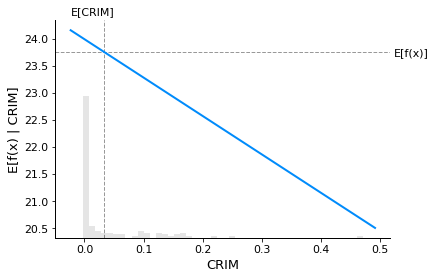

In [16]:
import shap
shap.partial_dependence_plot(
    "CRIM", ridge.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

In [47]:
!pip install numba --user

  Using cached https://files.pythonhosted.org/packages/1a/03/9927f144ba62393b3a3c16ea4d1f7c5c3ad4a8b8a7fbd2aec9d0b6bcb468/numba-0.56.0-cp37-cp37m-macosx_10_14_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3d/0c/bd8111f7bef10512fa77e0881c9619bccfc235f875d043d9026e00dbd7c6/llvmlite-0.39.0-cp37-cp37m-macosx_10_9_x86_64.whl


In [46]:
!pip install llvmlite --ignore installed


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

ambiguous option: --ignore (--ignore-installed, --ignore-requires-python?)


In [37]:
from sklearn.model_selection import KFold, cross_val_score
import optuna
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

# prepare the data
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
RANDOM_SEED = 42

#normalize train and then test data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit(X_test)


def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

# Lasso
##################

def lasso_objective(trial):
    
    # 5-fold CV
    kfolds = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)# Define the helper function so that it can be reused

    _alpha = trial.suggest_float("alpha", 0.0001, 1)
    lasso = Lasso(alpha=_alpha, random_state=RANDOM_SEED)
    scores = cross_val_score(
        lasso, X_train, y_train, cv=kfolds,
        scoring="neg_mean_squared_error"
    )
    return scores.mean()

lasso_params = tune(lasso_objective)

# lasso_params = {'alpha': 0.00041398687418613947}

lasso = Lasso(**lasso_params, random_state=RANDOM_SEED)##################


[I 2022-08-20 13:26:17,017] A new study created in memory with name: no-name-c47bd895-8fd6-454d-9236-5b829604bb01
[I 2022-08-20 13:26:17,033] Trial 0 finished with value: -51.52561653716957 and parameters: {'alpha': 0.7722431689793202}. Best is trial 0 with value: -51.52561653716957.
[I 2022-08-20 13:26:17,043] Trial 1 finished with value: -30.38882868399736 and parameters: {'alpha': 0.1817041696146233}. Best is trial 1 with value: -30.38882868399736.
[I 2022-08-20 13:26:17,052] Trial 2 finished with value: -40.13327151652752 and parameters: {'alpha': 0.44544050166073573}. Best is trial 1 with value: -30.38882868399736.
[I 2022-08-20 13:26:17,067] Trial 3 finished with value: -52.34262588564601 and parameters: {'alpha': 0.7932242097813096}. Best is trial 1 with value: -30.38882868399736.
[I 2022-08-20 13:26:17,079] Trial 4 finished with value: -28.92186037831946 and parameters: {'alpha': 0.11430102136843077}. Best is trial 4 with value: -28.92186037831946.
[I 2022-08-20 13:26:17,094] T

[I 2022-08-20 13:26:17,569] Trial 44 finished with value: -29.021623638254987 and parameters: {'alpha': 0.12024441415850544}. Best is trial 33 with value: -25.225478881362.
[I 2022-08-20 13:26:17,582] Trial 45 finished with value: -27.747984875296716 and parameters: {'alpha': 0.06422930456651912}. Best is trial 33 with value: -25.225478881362.
[I 2022-08-20 13:26:17,594] Trial 46 finished with value: -30.046880290341903 and parameters: {'alpha': 0.16872484552439654}. Best is trial 33 with value: -25.225478881362.
[I 2022-08-20 13:26:17,604] Trial 47 finished with value: -27.562433875630013 and parameters: {'alpha': 0.05721975874281305}. Best is trial 33 with value: -25.225478881362.
[I 2022-08-20 13:26:17,617] Trial 48 finished with value: -25.58943875231359 and parameters: {'alpha': 0.006457278844699902}. Best is trial 33 with value: -25.225478881362.
[I 2022-08-20 13:26:17,628] Trial 49 finished with value: -29.11473229111894 and parameters: {'alpha': 0.12551953452030917}. Best is tr

[I 2022-08-20 13:26:18,112] Trial 88 finished with value: -46.9904502363478 and parameters: {'alpha': 0.6459530706145706}. Best is trial 72 with value: -25.174995634423503.
[I 2022-08-20 13:26:18,128] Trial 89 finished with value: -26.19868779491598 and parameters: {'alpha': 0.023387474733104277}. Best is trial 72 with value: -25.174995634423503.
[I 2022-08-20 13:26:18,138] Trial 90 finished with value: -27.83355669757999 and parameters: {'alpha': 0.07046867420614711}. Best is trial 72 with value: -25.174995634423503.
[I 2022-08-20 13:26:18,152] Trial 91 finished with value: -25.27823305089376 and parameters: {'alpha': 0.0021876610061666987}. Best is trial 72 with value: -25.174995634423503.
[I 2022-08-20 13:26:18,164] Trial 92 finished with value: -27.429817373593313 and parameters: {'alpha': 0.05217279199884539}. Best is trial 72 with value: -25.174995634423503.
[I 2022-08-20 13:26:18,175] Trial 93 finished with value: -25.24479742230519 and parameters: {'alpha': 0.001604588219363680

Best score: -25.174995634423503

Optimized parameters: {'alpha': 0.00020968512252029147}



In [9]:
ridge_params

{'alpha': 0.10171202229311352}

In [15]:
X, y = datasets.load_diabetes(return_X_y=True)
X.shape

(442, 10)

## RandomForestRegressor

In [12]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
import numpy as np
import warnings
warnings.filterwarnings('ignore')

c
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
RANDOM_SEED = 42

def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=10)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params



def randomforest_objective(trial):
    
    
    # 5-fold CV
    kfolds = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)# Define the helper function so that it can be reused

    _n_estimators = trial.suggest_int("n_estimators", 50, 200)
    _max_depth = trial.suggest_int("max_depth", 5, 20)
    _min_samp_split = trial.suggest_int("min_samples_split", 2, 10)
    _min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    _max_features = trial.suggest_int("max_features", 5, 10)

    rf = RandomForestRegressor(
        max_depth=_max_depth,
        min_samples_split=_min_samp_split,
        min_samples_leaf=_min_samples_leaf,
        max_features=_max_features,
        n_estimators=_n_estimators,
        n_jobs=-1,
        random_state=RANDOM_SEED,
    )
    
    scores = cross_val_score(
        rf, X_train, y_train, cv= kfolds, scoring="neg_mean_squared_error"
    )
    return scores.mean()


randomforest_params = tune(randomforest_objective)
# randomforest_params = {'n_estimators': 180, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 49}
rf = RandomForestRegressor(n_jobs=-1, random_state=RANDOM_SEED, **randomforest_params)# So on with other models...
rf.fit(X_train, y_train)

[I 2022-08-20 11:52:45,491] A new study created in memory with name: no-name-98ad7a83-9bb5-4462-ac5a-3f55619e6dfa
[I 2022-08-20 11:52:46,850] Trial 0 finished with value: -12.56518409556209 and parameters: {'n_estimators': 141, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 9}. Best is trial 0 with value: -12.56518409556209.
[I 2022-08-20 11:52:48,208] Trial 1 finished with value: -17.85278866042729 and parameters: {'n_estimators': 195, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 5}. Best is trial 0 with value: -12.56518409556209.
[I 2022-08-20 11:52:49,480] Trial 2 finished with value: -15.187249478597938 and parameters: {'n_estimators': 128, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 10}. Best is trial 0 with value: -12.56518409556209.
[I 2022-08-20 11:52:50,585] Trial 3 finished with value: -14.234116813352923 and parameters: {'n_estimators': 78, 'max_depth': 14, 'min_samples_sp

Best score: -11.942615343091369

Optimized parameters: {'n_estimators': 101, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 6}



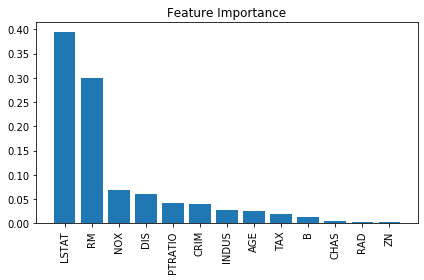

In [26]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()